# Model의 성능 향상시키기

## 데이터의 확인과 검증

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, LambdaCallback, EarlyStopping
import tensorflow as tf

### 데이터 불러오기

In [27]:
df = pd.read_csv("wine.csv", header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


### 데이터셋 분리

In [28]:
x = df.iloc[:, 0:12]
y = df.iloc[:, 12]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

### 모델 학습

In [29]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=500, validation_split=0.25)

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.2438 - loss: 29.5819 - val_accuracy: 0.2538 - val_loss: 24.7189
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2435 - loss: 21.6644 - val_accuracy: 0.2531 - val_loss: 17.0738
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2435 - loss: 14.3856 - val_accuracy: 0.2531 - val_loss: 11.2000
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2435 - loss: 10.0303 - val_accuracy: 0.2531 - val_loss: 8.5301
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2430 - loss: 7.8936 - val_accuracy: 0.2500 - val_loss: 6.8605
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2422 - loss: 6.2865 - val_accuracy: 0.2477 - val_loss: 5.3132
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2399 - loss: 4.8347 - val_accuracy: 0.2408 - val_loss: 4.2230
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2363 - loss: 3.9895 - val_accuracy: 0.2392 - val_loss: 3.5901


### 모델 평가

In [30]:
score_list = model.evaluate(x_test, y_test)
print(type(score_list), "[loss, accuracy] :", score_list)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9500 - loss: 0.1471 
<class 'list'> [loss, accuracy] : [0.1471223384141922, 0.949999988079071]


## 모델 업데이트하기

### 모델의 저장 설정 및 실행

In [31]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model_path = "wine_{epoch:02d}_{val_accuracy:.4f}.keras"
checkpoint = ModelCheckpoint(filepath=model_path, verbose=1)
history = model.fit(x_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpoint])


Epoch 1: saving model to wine_01_0.8308.keras

Epoch 1: finished saving model to wine_01_0.8308.keras

Epoch 2: saving model to wine_02_0.8138.keras

Epoch 2: finished saving model to wine_02_0.8138.keras

Epoch 3: saving model to wine_03_0.8592.keras

Epoch 3: finished saving model to wine_03_0.8592.keras

Epoch 4: saving model to wine_04_0.8838.keras

Epoch 4: finished saving model to wine_04_0.8838.keras

Epoch 5: saving model to wine_05_0.9000.keras

Epoch 5: finished saving model to wine_05_0.9000.keras

Epoch 6: saving model to wine_06_0.9131.keras

Epoch 6: finished saving model to wine_06_0.9131.keras

Epoch 7: saving model to wine_07_0.9092.keras

Epoch 7: finished saving model to wine_07_0.9092.keras

Epoch 8: saving model to wine_08_0.9100.keras

Epoch 8: finished saving model to wine_08_0.9100.keras

Epoch 9: saving model to wine_09_0.9092.keras

Epoch 9: finished saving model to wine_09_0.9092.keras

Epoch 10: saving model to wine_10_0.9185.keras

Epoch 10: finished savin

In [33]:
score_list = model.evaluate(x_test, y_test)
print(type(score_list), "[loss, accuracy] :", score_list)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.9608 - loss: 0.1996
<class 'list'> [loss, accuracy] : [0.19963380694389343, 0.9607692360877991]


### 그래프로 과적합 확인하기

#### 50번마다 한 번씩 출력하는 콜백 함수

In [44]:
def custom_log(epoch, logs):
    if (epoch + 1) % 50 == 0:
        num_batches = len(x_train) // 500
        print(f"Epoch {epoch+1}/2000")
        tf.print(f"{num_batches}/{num_batches} ━━━━━━━━━━━━━━━━━━━━ "
                f"accuracy: {logs['accuracy']:.4f} - loss: {logs['loss']:.4f} - "
                f"val_accuracy: {logs['val_accuracy']:.4f} - val_loss: {logs['val_loss']:.4f}")

show_status = LambdaCallback(on_epoch_end=custom_log)
history = model.fit(x_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=0, callbacks=[show_status])

Epoch 50/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9872 - loss: 0.0483 - val_accuracy: 0.9831 - val_loss: 0.0597
Epoch 100/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9856 - loss: 0.0469 - val_accuracy: 0.9846 - val_loss: 0.0592
Epoch 150/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9879 - loss: 0.0451 - val_accuracy: 0.9823 - val_loss: 0.0600
Epoch 200/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9864 - loss: 0.0462 - val_accuracy: 0.9846 - val_loss: 0.0584
Epoch 250/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9856 - loss: 0.0471 - val_accuracy: 0.9838 - val_loss: 0.0587
Epoch 300/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9869 - loss: 0.0449 - val_accuracy: 0.9777 - val_loss: 0.0703
Epoch 350/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9874 - loss: 0.0417 - val_accuracy: 0.9823 - val_loss: 0.0642
Epoch 400/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9895 - loss: 0.0397 - val_accuracy: 0.9808 - val_loss: 0.0605
Epoch 450/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9879 - loss: 0.0421

In [39]:
hist_df = pd.DataFrame(history.history)
hist_df.shape

(2000, 4)

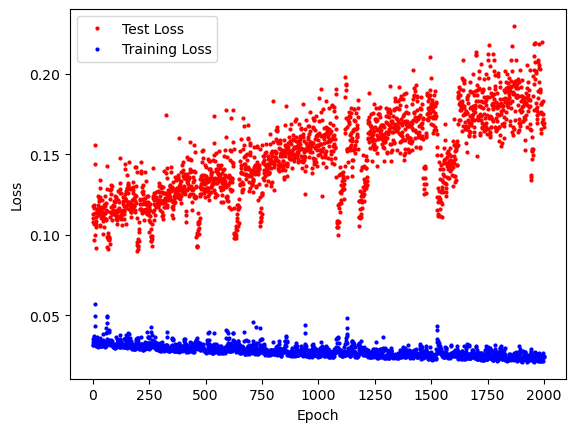

In [45]:
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']
x = np.arange(len(hist_df))
plt.plot(x, y_vloss, "o", c="red", markersize=2, label='Test Loss')
plt.plot(x, y_loss, "o", c="blue", markersize=2, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 학습의 자동 중단

### 기존코드 불러오기

In [41]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

### 학습의 자동 중단 및 최적화 모델 저장

In [42]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)
checkpoint = ModelCheckpoint(filepath="wine_best_model.keras", monitor='val_loss', verbose=0, save_best_only=True)
history = model.fit(x_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpoint])

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.2094 - loss: 4.9912 - val_accuracy: 0.1662 - val_loss: 2.8169
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2404 - loss: 1.5608 - val_accuracy: 0.6923 - val_loss: 0.5841
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7478 - loss: 0.4613 - val_accuracy: 0.7500 - val_loss: 0.4615
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7621 - loss: 0.4383 - val_accuracy: 0.7615 - val_loss: 0.4651
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7791 - loss: 0.4230 - val_accuracy: 0.7908 - val_loss: 0.4124
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8196 - loss: 0.3585 - val_accuracy: 0.8338 - val_loss: 0.3431
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8748 - loss: 0.3142 - val_accuracy: 0.8777 - val_loss: 0.3175
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8953 - loss: 0.2883 - val_accuracy: 0.8923 - val_

In [43]:
score_list = model.evaluate(x_test, y_test)
print(type(score_list), "[loss, accuracy] :", score_list)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9862 - loss: 0.0478 
<class 'list'> [loss, accuracy] : [0.04778821021318436, 0.9861538410186768]
